In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [18]:
# All comments provided insinde code cells for an easier exporting to the .py - files
%matplotlib notebook
%matplotlib notebook
import numpy as np
import json
import os
from numpy import savetxt
import pickle

import matplotlib.pyplot as plt
sizefont = 18

In [19]:
def subplot_axes_ticks_tuning(_AxesSubplot):
    _AxesSubplot.tick_params(axis = 'both',
                        which = 'major',
                        direction = 'in',
                        length = 5,
                        width = 2,
                        labelsize = sizefont
                        )

    _AxesSubplot.tick_params(axis = 'both',
                            which = 'minor',
                            direction = 'in',
                            length = 2,
                            width = 1,
                            bottom = True,
                            left = True
                        )
    _AxesSubplot.minorticks_on()
    



In [20]:
nSteps = 1155
with open("save_1155.pkl", "rb") as f:
    particles = pickle.load(f)
plt.rcParams["figure.figsize"] = (14,6)
plt.rc('font', size = sizefont, family = 'serif')


<IPython.core.display.Javascript object>


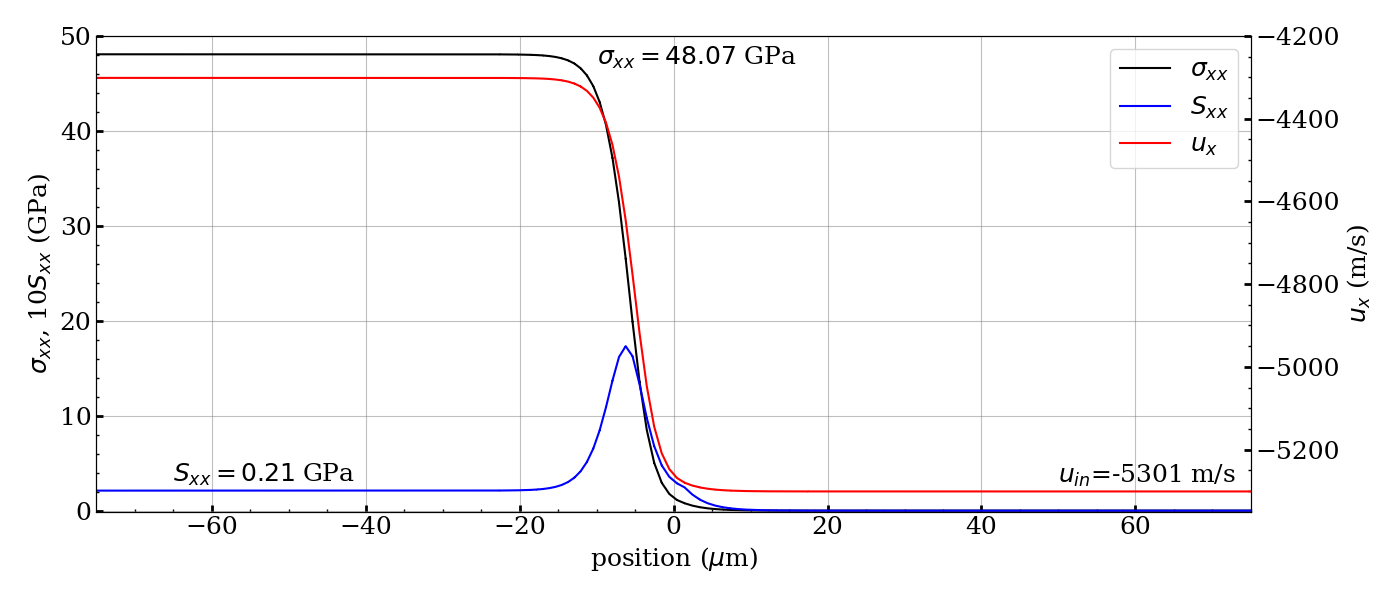

uin  -5301.29719246041
stressxx 48073410779.90458
deviatoric stress -210821207.31434366


In [21]:
sigma_x = plt.figure(2)
sigma = particles['pressure'][:]-particles['deviatorStress'][:,0]
deviator = particles['deviatorStress'][:,0]

coords = particles['coords'][:,0]
velocityx = particles['velocity'][:,0]

isorted = coords.argsort()
print("uin ", velocityx[isorted][-1])
print("stressxx", sigma[isorted][0])
print("deviatoric stress", deviator[isorted][100])

sigma_profile = sigma_x.add_subplot(111)
sigma_profile.plot(1e6*coords[isorted],1e-9*sigma[isorted], linestyle = '-', color="k", label = "$\sigma_{xx}$")

sigma_profile.plot(1e6*coords[isorted],-1e-8*deviator[isorted], linestyle = '-', color="blue", label = "$S_{xx}$")
sigma_profile.plot([100000],[111111111111], linestyle = '-', color="red", label = "$u_{x}$")

sigma_profile.set_xlim((-75,75))
#sigma_profile.set_xticks(np.arange(0.8, 1.01, 0.05))

sigma_profile.set_ylim((-0.1,50))

sigma_profile.grid(color='grey', alpha=0.5)    
csfont = {'size':sizefont} #'weight':'semibold',

sigma_profile.set_xlabel("position ($\mu$m)", **csfont)
sigma_profile.set_ylabel("$\sigma_{xx}$, 10$S_{xx}$ (GPa)", **csfont)

velocity = sigma_profile.twinx()
velocity.plot(1e6*coords[isorted],velocityx[isorted], linestyle = '-', color="red")
velocity.set_ylabel("$u_{x}$ (m/s)", **csfont)
velocity.set_ylim((-5350,-4200))

# sigma_profile.legend(ncol=2)
subplot_axes_ticks_tuning(sigma_profile)
velocity.tick_params(axis = 'y',
                    which = 'major',
                    direction = 'in',
                    length = 5,
                    width = 2,
                    labelsize = sizefont
                    )

velocity.tick_params(axis = 'y',
                        which = 'minor',
                        direction = 'in',
                        length = 2,
                        width = 1,
                        bottom = True,
                        right = True                    )
velocity.minorticks_on()
text = {'size':sizefont}
velocity.text(50,-5280,"$u_{in}$=-5301$\;$m/s",**text)
sigma_profile.text(-65,3,"$S_{xx} = 0.21\;$GPa",**text)
sigma_profile.text(-10,47,"$\sigma_{xx} = 48.07\;$GPa",**text)
sigma_profile.legend(prop={'size':sizefont}, ncol = 1, loc = 0)

plt.tight_layout()
# sigma_profile.yaxis.set_major_locator(MultipleLocator(20))
# sigma_profile.yaxis.set_minor_locator(MultipleLocator(2.5))


In [23]:
sigma_x.savefig("stress_deviatorStress_velocity.pdf", dpi=300, format='pdf') 
